In [89]:
import pandas as pd
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
olympics = pd.read_csv("../data/athlete_events.csv") 

In [91]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [92]:
olympics.shape

(271116, 15)

In [93]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [94]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [95]:
# Check duplicates
print("Duplicate rows:", olympics.duplicated().sum())

# Remove duplicates
olympics = olympics.drop_duplicates().reset_index(drop=True)


Duplicate rows: 1385


In [96]:
olympics.shape

(269731, 15)

In [97]:
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269726,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
269727,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
269728,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
269729,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [98]:
olympics.isna().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

In [99]:
(olympics.isnull().sum() / len(olympics)) * 100


ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.453441
Height    21.804687
Weight    22.810504
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.254939
dtype: float64

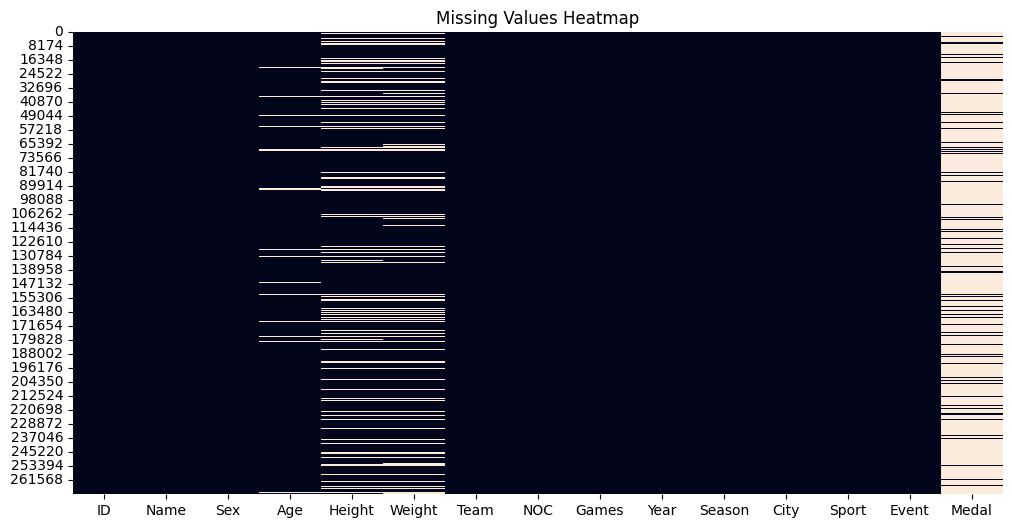

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(olympics.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [101]:
olympics[['Age','Height','Weight']].skew()


Age       1.561797
Height    0.018643
Weight    0.797266
dtype: float64

In [ ]:
olympics['Age'] = olympics['Age'].fillna(olympics['Age'].median())
olympics['Weight'] = olympics['Weight'].fillna(olympics['Weight'].mean())
olympics['Height'] = olympics['Height'].fillna(olympics['Height'].median())
olympics['Medal'] = olympics['Medal'].fillna("None")









In [103]:
olympics['Team'].value_counts().to_frame()

,count
Team,
United States,17598
France,11817
Great Britain,11264
Italy,10213
Germany,9230
...,...
Souriceau-38,1
Carabinier-5,1
Ducky-4,1


In [104]:
olympics['cleaned_team'] = olympics['Team'].str.split('[/-]').str[0]
olympics = olympics.drop(columns=['Team'])


In [105]:
olympics

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,cleaned_team
0,1,A Dijiang,M,24.0,180.0,80.000000,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.000000,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.701778,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.701778,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269726,135569,Andrzej ya,M,29.0,179.0,89.000000,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None,Poland
269727,135570,Piotr ya,M,27.0,176.0,59.000000,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None,Poland
269728,135570,Piotr ya,M,27.0,176.0,59.000000,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None,Poland
269729,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.000000,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None,Poland


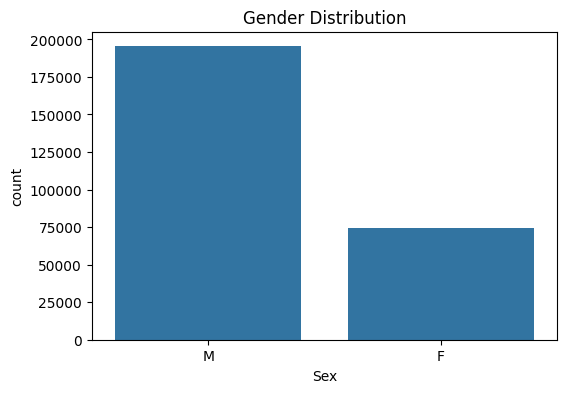

In [106]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=olympics)
plt.title('Gender Distribution')
plt.show()


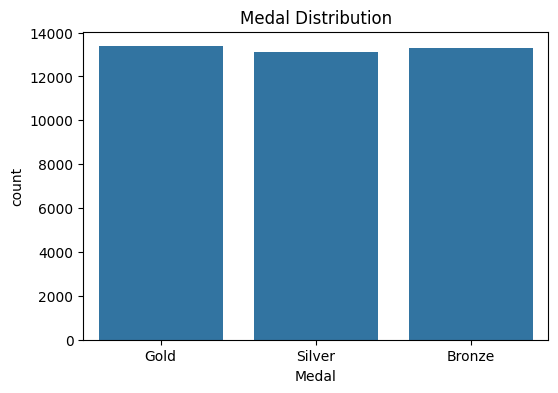

In [108]:
plt.figure(figsize=(6,4))
sns.countplot(x='Medal', data=olympics, order=['Gold','Silver','Bronze'])
plt.title('Medal Distribution')
plt.show()


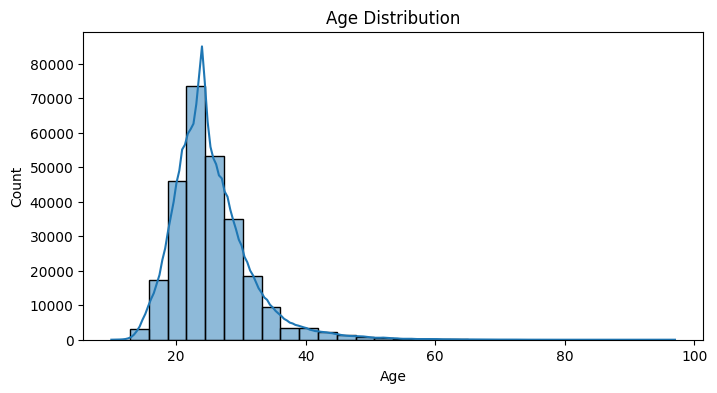

In [109]:
plt.figure(figsize=(8,4))
sns.histplot(olympics['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


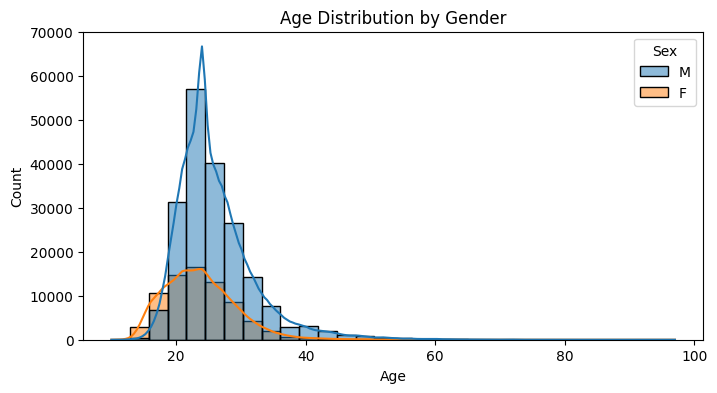

In [110]:
plt.figure(figsize=(8,4))
sns.histplot(data=olympics, x='Age', hue='Sex', bins=30, kde=True)
plt.title('Age Distribution by Gender')
plt.show()


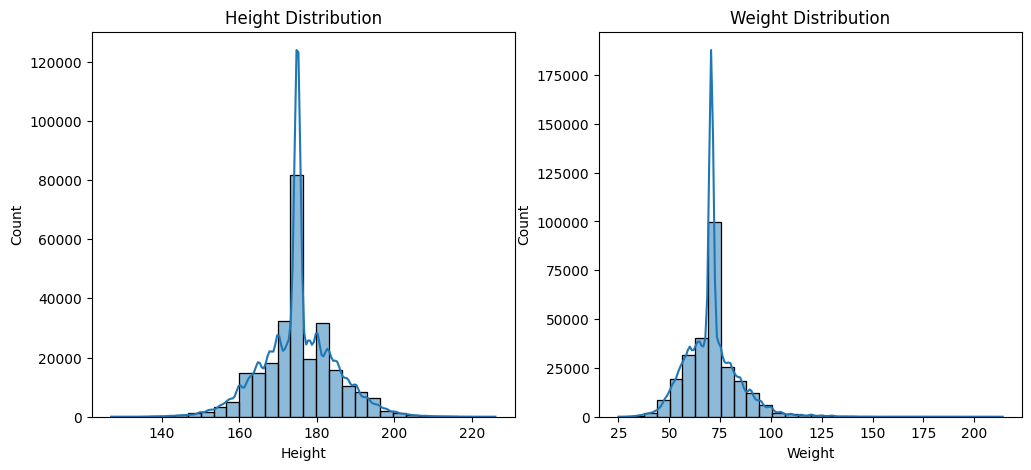

In [111]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(olympics['Height'], bins=30, kde=True)
plt.title('Height Distribution')

plt.subplot(1,2,2)
sns.histplot(olympics['Weight'], bins=30, kde=True)
plt.title('Weight Distribution')
plt.show()


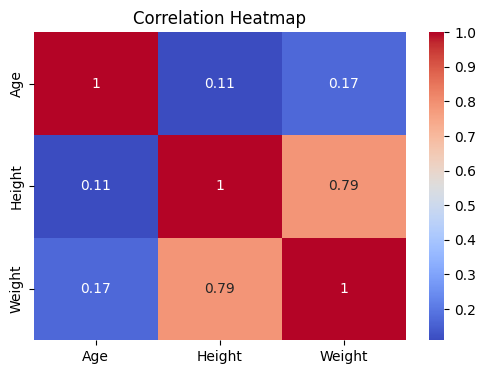

In [112]:
numerical_cols = ['Age','Height','Weight']
plt.figure(figsize=(6,4))
sns.heatmap(olympics[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


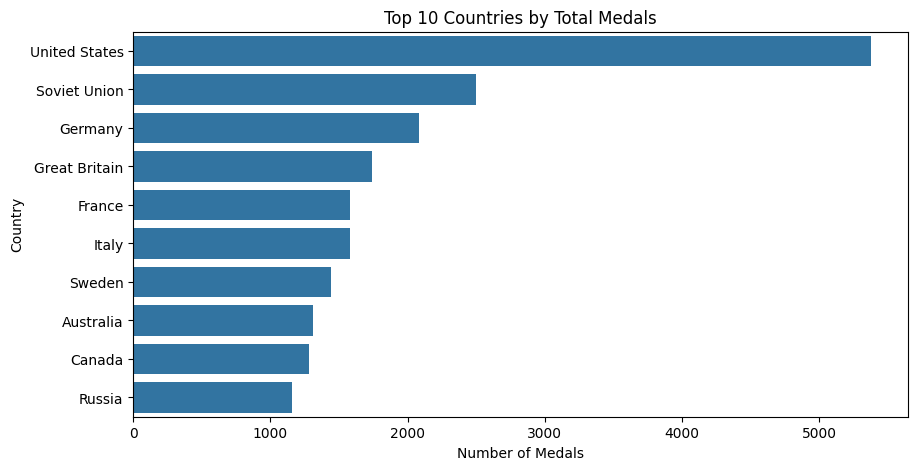

In [117]:
medal_winners = olympics[olympics['Medal'] != 'None']
top_countries = medal_winners['cleaned_team'].value_counts().head(10)


plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Country')
plt.show()


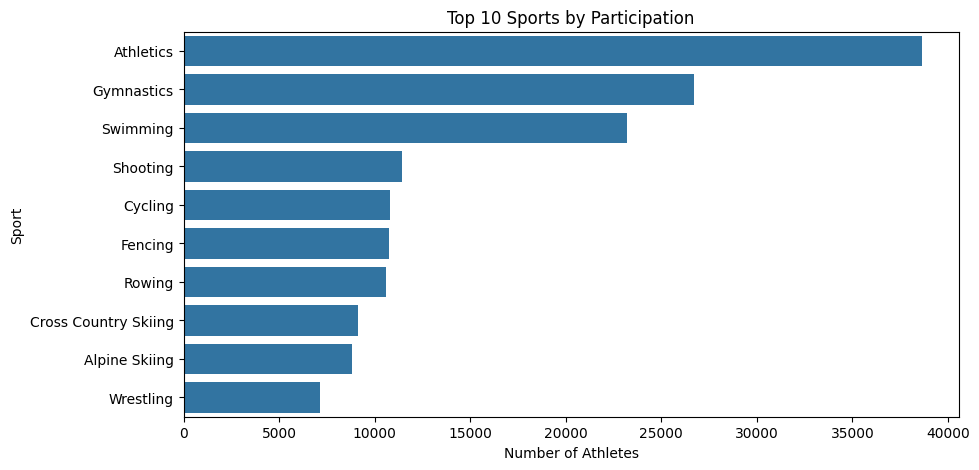

In [136]:
top_sports = olympics['Sport'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_sports.values, y=top_sports.index)
plt.title('Top 10 Sports by Participation')
plt.xlabel('Number of Athletes')
plt.ylabel('Sport')
plt.show()


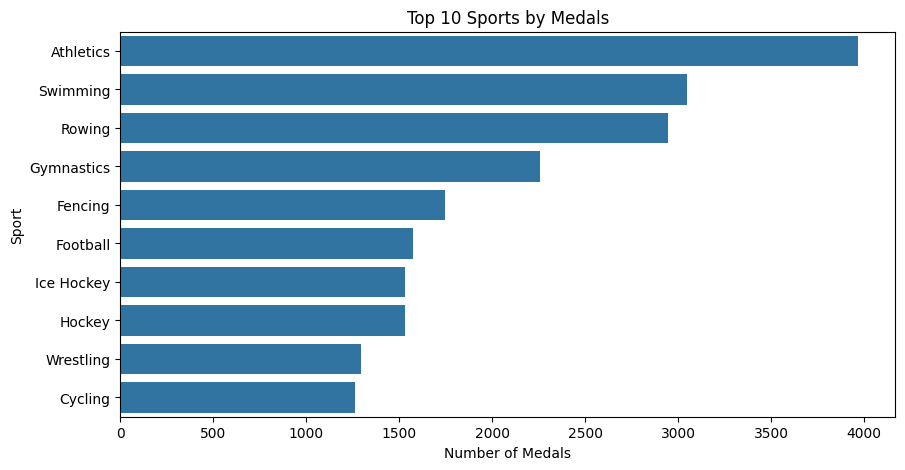

In [119]:
medals_by_sport = medal_winners['Sport'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=medals_by_sport.values, y=medals_by_sport.index)
plt.title('Top 10 Sports by Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.show()


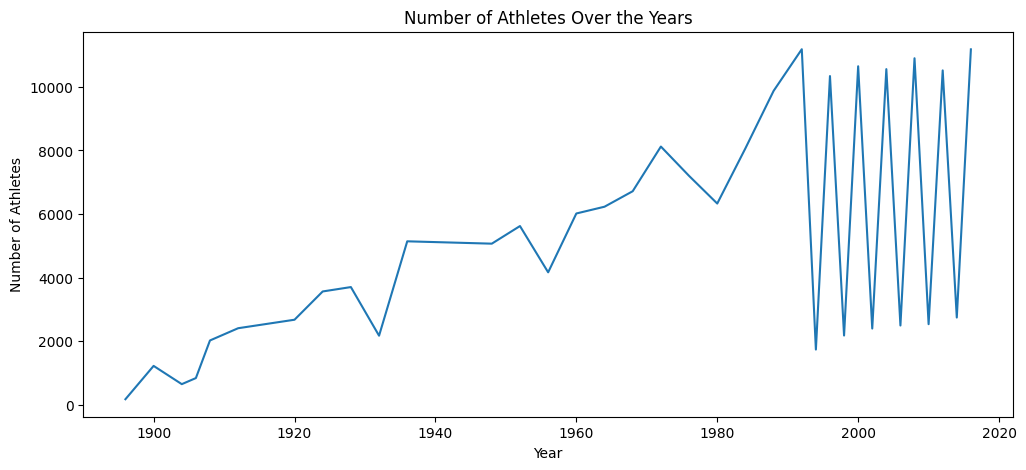

In [120]:
athletes_over_years = olympics.groupby('Year')['ID'].nunique()

plt.figure(figsize=(12,5))
sns.lineplot(x=athletes_over_years.index, y=athletes_over_years.values)
plt.title('Number of Athletes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.show()


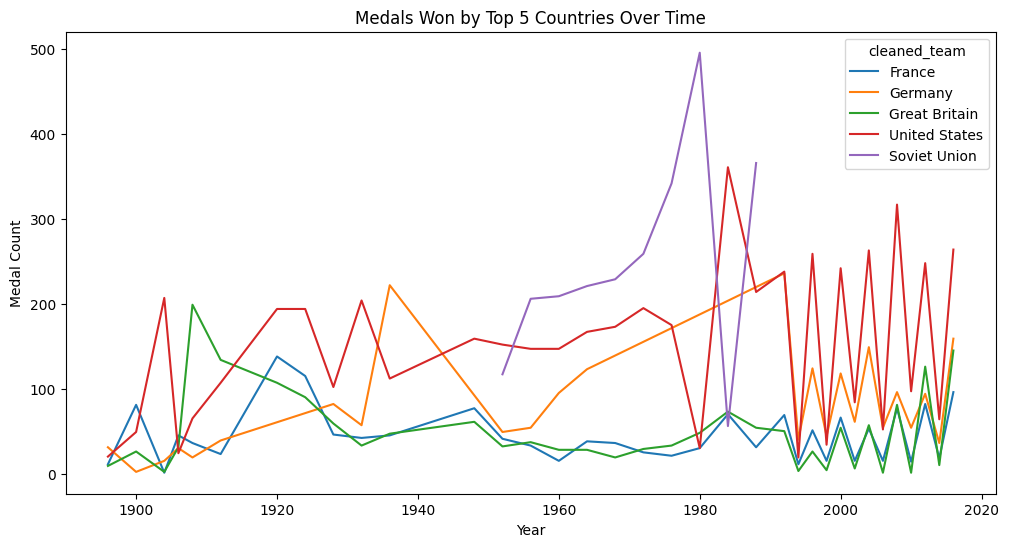

In [123]:
medals_over_time = medal_winners.groupby(['Year','cleaned_team']).size().reset_index(name='Medal Count')

top_5_countries = medal_winners['cleaned_team'].value_counts().head(5).index
medals_top_countries = medals_over_time[medals_over_time['cleaned_team'].isin(top_5_countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=medals_top_countries, x='Year', y='Medal Count', hue='cleaned_team')
plt.title('Medals Won by Top 5 Countries Over Time')
plt.show()


In [124]:
top_athletes = medal_winners.groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
print(top_athletes)


Name
Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Ole Einar Bjrndalen                                13
Borys Anfiyanovych Shakhlin                        13
Edoardo Mangiarotti                                13
Takashi Ono                                        13
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Dara Grace Torres (-Hoffman, -Minas)               12
Birgit Fischer-Schmidt                             12
Name: Medal, dtype: int64


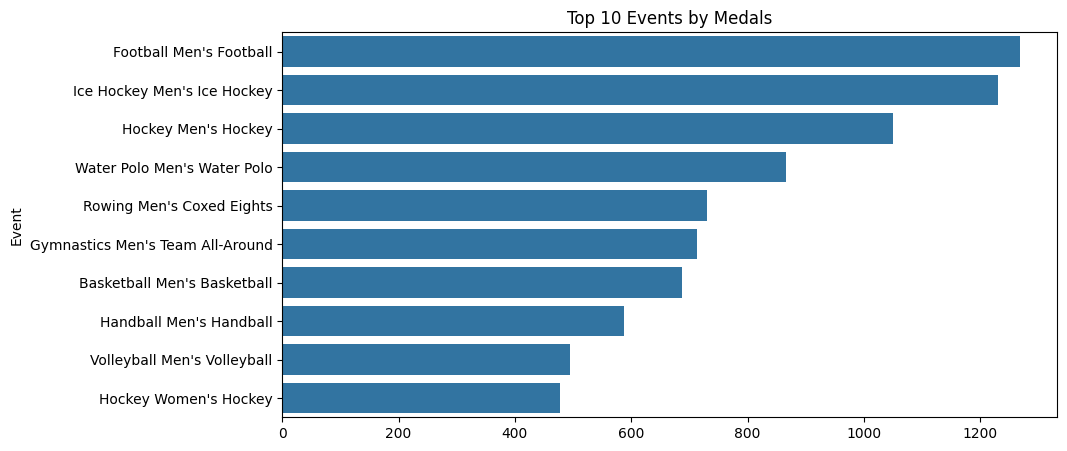

In [125]:
top_events = medal_winners['Event'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_events.values, y=top_events.index)
plt.title('Top 10 Events by Medals')
plt.show()


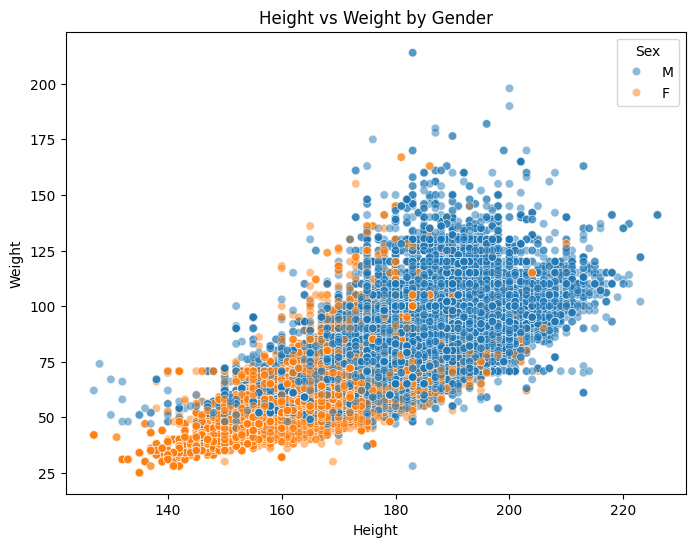

In [126]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=olympics, x='Height', y='Weight', hue='Sex', alpha=0.5)
plt.title('Height vs Weight by Gender')
plt.show()


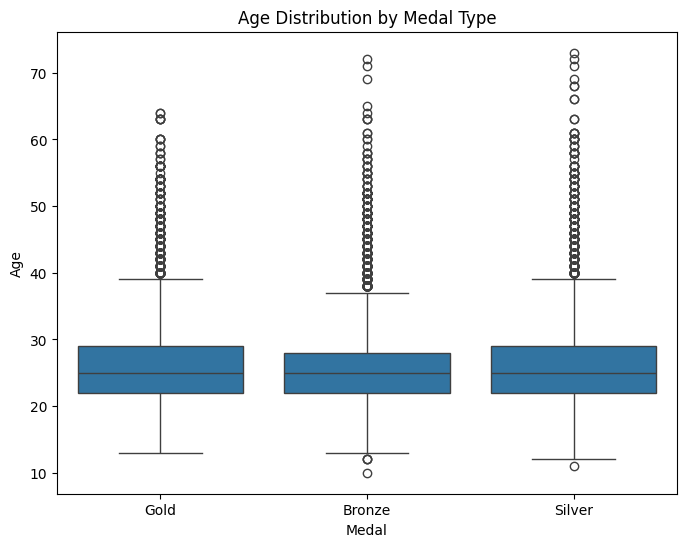

In [127]:
plt.figure(figsize=(8,6))
sns.boxplot(data=medal_winners, x='Medal', y='Age')
plt.title('Age Distribution by Medal Type')
plt.show()
